## Section 1: Initial settings 

#### 1.1 Importing packages and functions

In [14]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np
from numpy import cos, sin, arcsin, arccos, arctan

from sympy import init_printing
init_printing

%matplotlib inline

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"] = 0.7

from example import get_sim
from example import sim_signal
from example import simple_func
from example import E_from_M
from example import proper_motion_eq
from example import parallax_eq
from example import planetary_eq
from example import thiele_innes

#### 1.2 Unit conversions

In [15]:
rad_mas = 206264806
rad_as  = 206264806/1000
as_mas  = 1000
AU_pc   = 4.84814e-6
as_rad  = 4.84814e-6

#### 1.3 Setting parameters for earth, star and planet and setting timescale 

In [16]:
# star parameters 
d       = 1.031e7                                             # initial distance                    []
delta   = np.pi/4                                             # initial delta                       []
alpha   = np.pi/4                                             # initial alpha                       []
m_star  = 1                                                   # mass of star                        [M_solar]
vx_star = 0                                                   # velocity of star in x direction     [AU/year]
vy_star = 4.74*(50*0.001)*(50)* (1/1.496e+8) * (3.154e+7)     # velocity of star in y direction     [AU/year]
vz_star = 1.7*vy_star                                         # velocity of star in z direction     [AU/year]

# planet parameters 
inc           = 0.2                                           # orbital inclination                 [rad]
m_planet      = 0.0143188                                     # mass of planet                      [M_solar]
a_AU          = 0.6                                           # semi-major axis                     [AU]
e             = 0.2                                           # ellipticity of the orbit            [unitless]
omega         = 2                                             # argument of perihelion              [rad] 
Omega         = 1                                             # longitude of the ascending node     [rad]
tau           = 0                                             # time of pericentre passage          [years]
t0            = 0                                             # wrt Julian date                     [years]
proper_motion = 0.05                                          # proper motion of the system         [as/year]

# earth parameters
a_earth = 1

# timescale 
timescale = 4.2
m         = 200
times     = np.linspace(0,timescale,num = m)

## Section 2: Calling functions

#### 3.1 Simulation

In [17]:
# use get_sim to get simulations 
sim_wp, sim = get_sim(d, delta, alpha, m_star, vx_star, vy_star, vz_star, m_planet, a_AU, e,omega,Omega, inc)

# setting values for the without planet simulation sim_signal
sim_values = sim_signal(sim, times, m)
delta_SE_np, alpha_SE_np, delta_SC_np, alpha_SC_np, R_SC_0_np, V_SC_0_np = sim_values

# setting values for the with planet simulation using sim_signal
sim_wp_values = sim_signal(sim_wp, times, m)
delta_SE_wp, alpha_SE_wp, delta_SC_wp, alpha_SC_wp, R_SC_0_wp, V_SC_0_wp = sim_wp_values

#### 3.2 Equations 

In [18]:
pm_term_dec_np, pm_term_ra_np = proper_motion_eq(R_SC_0_np, V_SC_0_np, times, t0)
pm_term_dec_wp, pm_term_ra_wp = proper_motion_eq(R_SC_0_wp, V_SC_0_wp, times, t0)

parallax_dec_np, parallax_ra_np = parallax_eq(R_SC_0_np, times, t0, a_earth)
parallax_dec_wp, parallax_ra_wp = parallax_eq(R_SC_0_wp, times, t0, a_earth)

planetary_dec, planetary_ra = planetary_eq(R_SC_0_wp, m_star, m_planet, omega, Omega, inc, e, a_AU, times, tau)

In [19]:
# setting signal as individual 
signal_dec_np = pm_term_dec_np + parallax_dec_np 
signal_ra_np  = pm_term_ra_np  + parallax_ra_np

signal_dec_wp = pm_term_dec_wp + parallax_dec_wp + planetary_dec 
signal_ra_wp  = pm_term_ra_wp  + parallax_ra_wp  + planetary_ra 

## Section 4: Plots

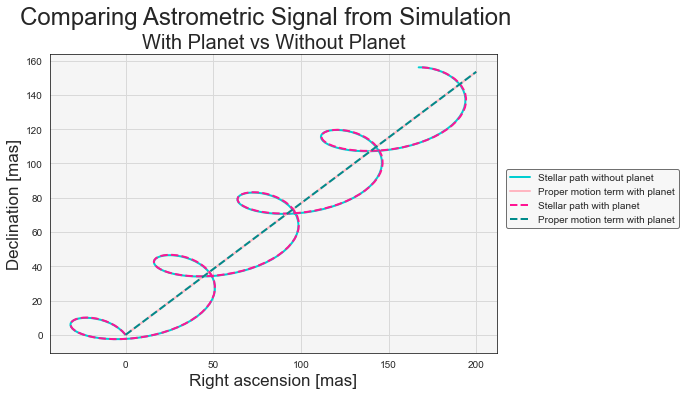

In [20]:
# plotting data 
plt.plot((alpha_SE_np-alpha_SE_np[0])*rad_mas, 
         (delta_SE_np-delta_SE_np[0])*rad_mas, 
         color='darkturquoise', 
         lw=2,           
         label = 'Stellar path without planet')

plt.plot((alpha_SC_np-alpha_SC_np[0])*rad_mas, 
         (delta_SC_np-delta_SC_np[0])*rad_mas, 
         color='lightpink', 
         lw=2, 
         label = 'Proper motion term with planet')

plt.plot((alpha_SE_wp-alpha_SE_wp[0])*rad_mas, 
        (delta_SE_wp-delta_SE_wp[0])*rad_mas, 
         color='deeppink', 
         lw=2, 
         ls='--', 
         label = 'Stellar path with planet')

plt.plot((alpha_SC_wp-alpha_SC_wp[0])*rad_mas, 
         (delta_SC_wp-delta_SC_wp[0])*rad_mas, 
         color='darkcyan', 
         lw=2, 
         ls='--', 
         label = 'Proper motion term with planet')


# set titles 
plt.suptitle('Comparing Astrometric Signal from Simulation',fontsize=24, y=1) 
plt.title('With Planet vs Without Planet',fontsize=20)
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.42, 0.4))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

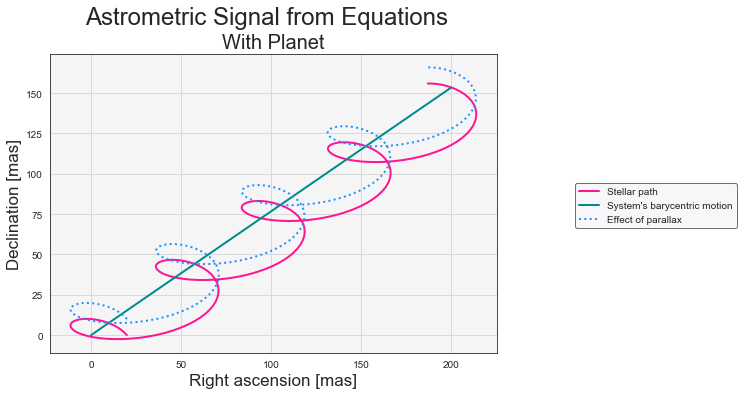

In [21]:
# plotting data with planet 
plt.plot(signal_ra_wp*rad_mas, 
         (signal_dec_wp-signal_dec_wp[0])*rad_mas, 
         color='deeppink', 
         lw=2,
         label = 'Stellar path')

plt.plot(pm_term_ra_wp*rad_mas, 
         pm_term_dec_wp*rad_mas, 
         color='darkcyan', 
         lw=2,            
         label = 'System\'s barycentric motion')

plt.plot((parallax_ra_wp+pm_term_ra_wp)*rad_mas, 
         (parallax_dec_wp+pm_term_dec_wp)*rad_mas, 
         color='dodgerblue', 
         lw=2, 
         ls='dotted', 
         label = 'Effect of parallax ')

# plt.plot((planetary_ra+pm_term_ra_wp)*rad_mas, 
#          (planetary_dec+pm_term_dec_wp)*rad_mas, 
#          color='dodgerblue', 
#          lw=2, 
#          ls='--', 
#          label = 'Effect of planet')

# set titles 
plt.suptitle('Astrometric Signal from Equations',fontsize=24, y=1) 
plt.title('With Planet',fontsize=20)            
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.55, 0.4))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

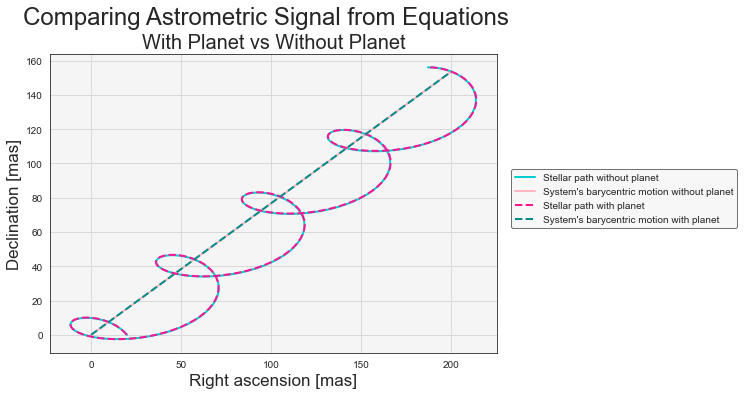

In [22]:
# plotting data without planet 
plt.plot(signal_ra_np*rad_mas, 
         (signal_dec_np-signal_dec_np[0])*rad_mas, 
         color='darkturquoise', 
         lw=2,
         label = 'Stellar path without planet')

# plotting proper motion 
plt.plot(pm_term_ra_np*rad_mas, 
         pm_term_dec_np*rad_mas, 
         color='lightpink', 
         lw=2,            
         label = 'System\'s barycentric motion without planet')

# plotting data with planet 
plt.plot(signal_ra_wp*rad_mas, 
         (signal_dec_wp-signal_dec_wp[0])*rad_mas, 
         color='deeppink', 
         lw=2,
         ls='--',
         label = 'Stellar path with planet')

plt.plot(pm_term_ra_wp*rad_mas, 
         pm_term_dec_wp*rad_mas, 
         color='darkcyan', 
         lw=2,           
         ls='--', 
         label = 'System\'s barycentric motion with planet')

# set titles 
plt.suptitle('Comparing Astrometric Signal from Equations',fontsize=24, y=1) 
plt.title('With Planet vs Without Planet',fontsize=20)            
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.55, 0.4))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

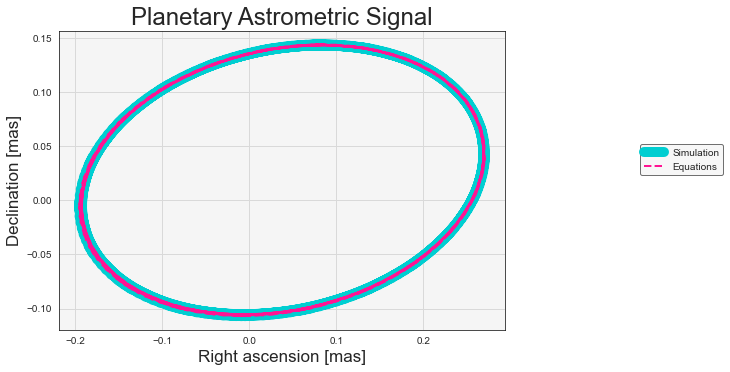

In [23]:
# plotting data 
ra_diff = alpha_SE_wp - alpha_SE_np
dec_diff = (delta_SE_wp) - (delta_SE_np)

plt.plot(ra_diff*rad_mas, 
         dec_diff*rad_mas, 
         color='darkturquoise', 
         lw=10,           
         label = 'Simulation')

plt.plot(planetary_ra*rad_mas, 
         planetary_dec*rad_mas, 
         color='deeppink', 
         lw=2,
         ls='--',
         label = 'Equations')

# set titles 
plt.title('Planetary Astrometric Signal', fontsize = 24)             
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.5, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

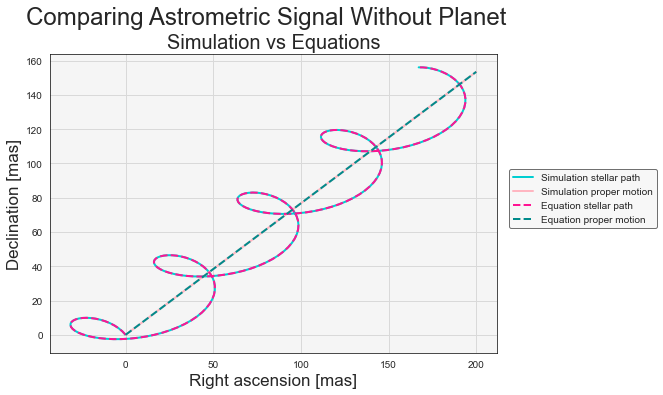

In [24]:
# plotting data without planet 
plt.plot((alpha_SE_np-alpha_SE_np[0])*rad_mas, 
        (delta_SE_np-delta_SE_np[0])*rad_mas, 
         color='darkturquoise', 
         lw=2, 
         label = 'Simulation stellar path')

plt.plot((alpha_SC_np-alpha_SC_np[0])*rad_mas, 
         (delta_SC_np-delta_SC_np[0])*rad_mas, 
         color='lightpink', 
         lw=2, 
         label = 'Simulation proper motion')


plt.plot((signal_ra_np-signal_ra_np[0])*rad_mas, 
         (signal_dec_np-signal_dec_np[0])*rad_mas, 
         color='deeppink', 
         lw=2,
         ls='--', 
         label = 'Equation stellar path')

plt.plot(pm_term_ra_np*rad_mas, 
         pm_term_dec_np*rad_mas, 
         color='darkcyan', 
         lw=2,           
         ls='--', 
         label = 'Equation proper motion')

# set titles 
plt.suptitle('Comparing Astrometric Signal Without Planet',fontsize=24, y=1) 
plt.title('Simulation vs Equations',fontsize=20)           
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.37, 0.4))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

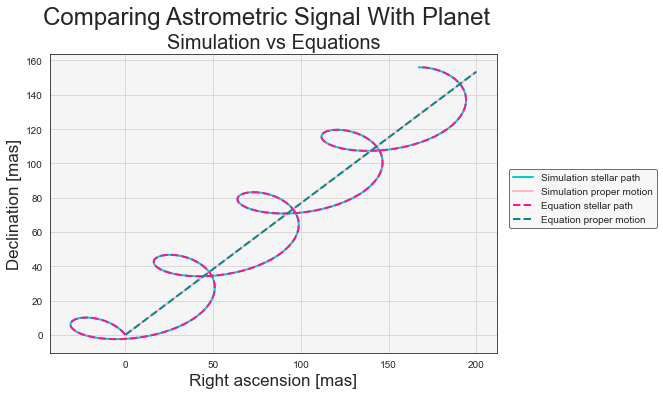

In [25]:
# plotting data with planet 
plt.plot((alpha_SE_wp-alpha_SE_wp[0])*rad_mas, 
        (delta_SE_wp-delta_SE_wp[0])*rad_mas, 
         color='darkturquoise', 
         lw=2, 
         label = 'Simulation stellar path')

plt.plot((alpha_SC_wp-alpha_SC_wp[0])*rad_mas, 
         (delta_SC_wp-delta_SC_wp[0])*rad_mas, 
         color='lightpink', 
         lw=2, 
         label = 'Simulation proper motion')

plt.plot((signal_ra_wp-signal_ra_wp[0])*rad_mas, 
         (signal_dec_wp-signal_dec_wp[0])*rad_mas, 
         color='deeppink', 
         lw=2,
         ls='--', 
         label = 'Equation stellar path')

plt.plot(pm_term_ra_wp*rad_mas, 
         pm_term_dec_wp*rad_mas, 
         color='darkcyan', 
         lw=2,           
         ls='--', 
         label = 'Equation proper motion')


# set titles 
plt.suptitle('Comparing Astrometric Signal With Planet',fontsize=24, y=1) 
plt.title('Simulation vs Equations',fontsize=20)             
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.37, 0.4))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)